# **EDA - Exploratory Data Analysis**

EDA é a análise exploratória de dados, mas o que é isso? Em sua essencia é analisar bases de dados com o intuito de extrair insights, informações úteis dos dados.

Consiste em um exploração descritiva dos dados, tais como verificar registros e valores faltantes até uma análise visual, que facilita a interpretação.

Técnicas estatísticas são utilizadas, como analisar a distribuição dos dados, validação de hipóteses, verificar a correlação dos dados, dispersão entre outras.

Mas antes da etapa de EDA, precisamos ter dados validados, ou seja, dados confiáveis para análises verdadeiras, pra isso utilizaremos uma amostra dos dados por ano, 2017, 2018 e 2019 de Reclamações de consumidores do site consumidor.gov.br

Para começar, precisamos conhecer um pouco do negócio e entender o que significa cada feature e para isso tem um PDF no próprio site, no qual explica cada uma.

# Importar as bibliotecas

In [1]:
# manipulação dos dados
import numpy as np
import pandas as pd

# visualização dos dados
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# ignorar mensagens de warnings
import warnings
warnings.filterwarnings("ignore")

# **Primeiras impressões**

In [2]:
# importando o conjunto de dados
df = pd.read_csv('RegistroReclamacaoAmostraEDA.csv', sep=',')

In [3]:
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,...,Avaliação Reclamação,Nota do Consumidor,Total,Cidade2,Data Abertura,Ano Abertura,Mes Abertura,Dia Abertura,Dia Semana Abertura,Final Semana
0,CO,DF,Brasília,F,entre 31 a 40 anos,2018-01-27,7.0,Oi Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,...,Resolvida,3.0,1,BRASILIA,2018-01-20,2018.0,1.0,20.0,5.0,1
1,SE,SP,Guarulhos,M,entre 21 a 30 anos,2018-01-23,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,...,Resolvida,3.0,1,GUARULHOS,2018-01-13,2018.0,1.0,13.0,5.0,1
2,SE,SP,São Paulo,M,entre 31 a 40 anos,2018-01-27,7.0,Bradesco Cartões,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,...,Não Resolvida,3.0,1,SAO PAULO,2018-01-20,2018.0,1.0,20.0,5.0,1
3,NE,PE,Recife,M,entre 31 a 40 anos,2018-01-18,2.0,Banco Cetelem,"Bancos, Financeiras e Administradoras de Cartão",Demais Serviços,...,Resolvida,2.0,1,RECIFE,2018-01-16,2018.0,1.0,16.0,1.0,0
4,CO,MT,Sinop,M,entre 21 a 30 anos,2018-01-20,7.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,...,Não Resolvida,5.0,1,SINOP,2018-01-13,2018.0,1.0,13.0,5.0,1


In [4]:
# verificando tipo de cada features
# verificando a quantidade em cada feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930622 entries, 0 to 930621
Data columns (total 27 columns):
Região                    930622 non-null object
UF                        930622 non-null object
Cidade                    930622 non-null object
Sexo                      930622 non-null object
Faixa Etária              930622 non-null object
Data Finalização          930622 non-null object
Tempo Resposta            923030 non-null float64
Nome Fantasia             930622 non-null object
Segmento de Mercado       930622 non-null object
Área                      930622 non-null object
Assunto                   930622 non-null object
Grupo Problema            930622 non-null object
Problema                  930622 non-null object
Como Comprou Contratou    930622 non-null object
Procurou Empresa          930622 non-null object
Respondida                930622 non-null object
Situação                  930622 non-null object
Avaliação Reclamação      930622 non-null object
Nota d

**Análise:** temos 930.622 registros com 20 colunas, podemos observar que a maioria é do tipo "Objeto" e notamos que temos alguns dados faltantes.

In [5]:
# Verificando quais colunas possuem dados faltantes e sua quantidade
df.isnull().sum()

Região                         0
UF                             0
Cidade                         0
Sexo                           0
Faixa Etária                   0
Data Finalização               0
Tempo Resposta              7592
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação           0
Nota do Consumidor        394089
Total                          0
Cidade2                        0
Data Abertura               7592
Ano Abertura                7592
Mes Abertura                7592
Dia Abertura                7592
Dia Semana Abertura         7592
Final Semana                   0
dtype: int64

**Análise:** Faltando dados em tempo na resposta e na nota do consumidor. Podemos notar que o número faltante de notas é bem alto.

In [6]:
# convertendo str em formato data
df['Data Abertura'] = pd.to_datetime(df['Data Abertura'], format="%Y/%m/%d")

# subtraindo a data da finalização pela quantidade de dias para encerramento
df['Data Finalização'] = pd.to_datetime(df['Data Finalização'], format="%Y/%m/%d")

In [7]:
# criando uma série temporal
df_Temporal = pd.DataFrame(df.groupby(['Data Abertura', 'Data Finalização', 'Ano Abertura', 'Mes Abertura', 'Dia Abertura', 'Dia Semana Abertura', 
                                       'Tempo Resposta', 'Final Semana'])['Total'].count())

# removendo index e colocando a variável Data Abertura como index
df_Temporal = df_Temporal.reset_index().set_index('Data Abertura')

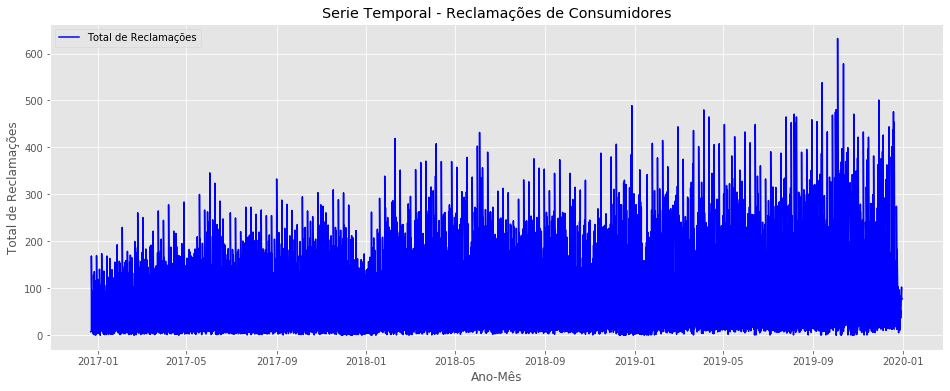

In [8]:
# criando um plot
plt.figure(figsize=(16, 6))
plt.title("Serie Temporal - Reclamações de Consumidores")
plt.plot(df_Temporal['Total'], label = "Total de Reclamações", color = 'b')
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Reclamações")
plt.legend(loc = "best");

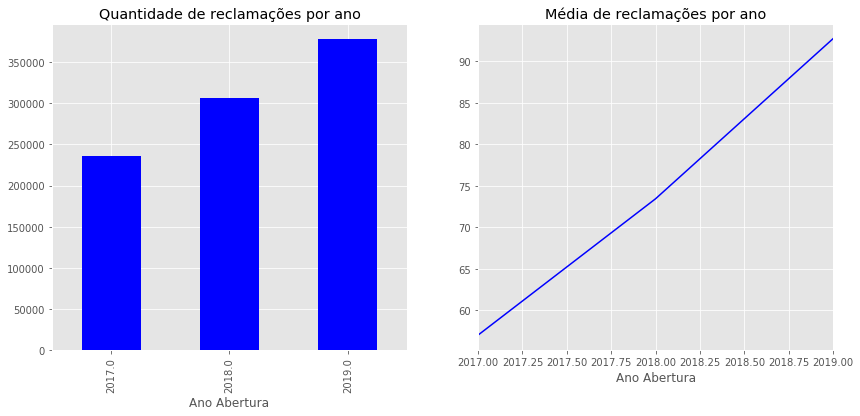

In [9]:
# analisando a quantidade de reclamações por ano
# será excluído o ano de 2016 em função de termos histórico somente do um pedação de dezembro

# criando a representação de plotagem
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))

# criando o gráfico 1
df_Temporal[df_Temporal['Ano Abertura'] != 2016].groupby(['Ano Abertura'])['Total'].sum().plot.bar(color='b', ax=ax1)
ax1.set_title('Quantidade de reclamações por ano')

# criando o gráfico 2
df_Temporal[df_Temporal['Ano Abertura'] != 2016].groupby(['Ano Abertura'])['Total'].mean().plot.line(color='b', ax=ax2)
ax2.set_title('Média de reclamações por ano');

**Análise:** A quantidade de reclamações vem aumentando ao longo dos anos

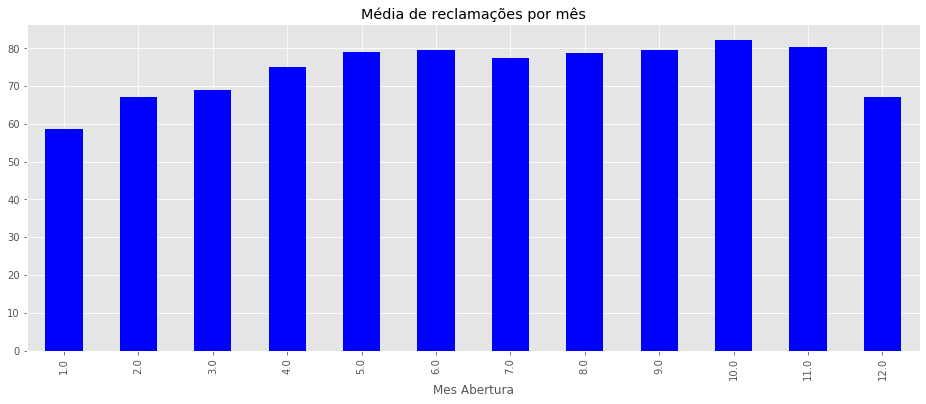

In [10]:
# analisando a média pelos meses dos anos
plt.figure(figsize=(16, 6))
df_Temporal.groupby(['Mes Abertura'])['Total'].mean().plot.bar(color='b');
plt.title('Média de reclamações por mês');

**Análise**: Aparentemente os primeiros meses tem menos reclamações, mas a diferença não parece ser significativa.

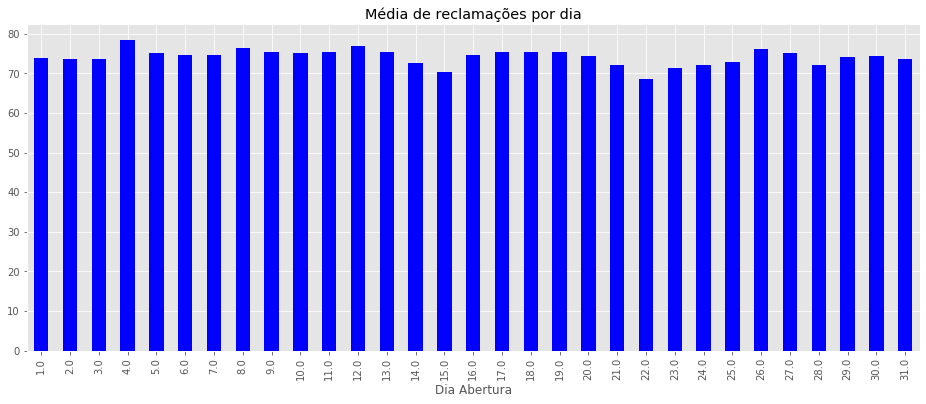

In [11]:
# Vamos analisar os dias nos meses
plt.figure(figsize=(16, 6))
df_Temporal.groupby(['Dia Abertura'])['Total'].mean().plot.bar(color='b');
plt.title('Média de reclamações por dia');

**Análise:** Não há diferença significativa de reclamações entre os dias.

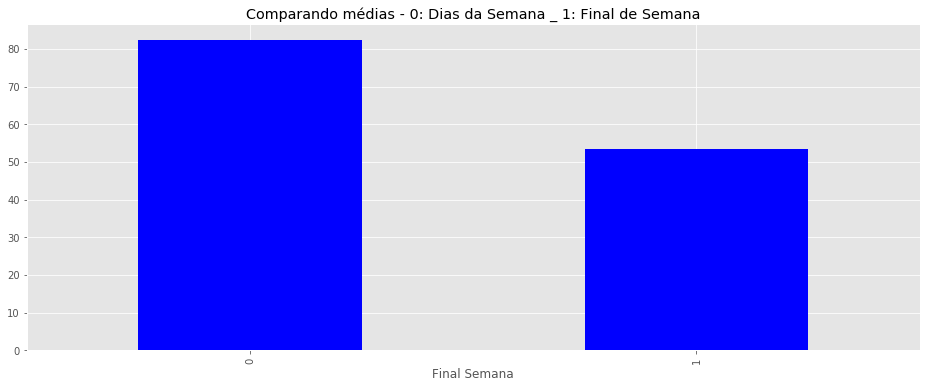

In [12]:
# Vamos analisar se dia sa semana ou final de semana diferem
plt.figure(figsize=(16, 6))
df_Temporal.groupby(['Final Semana'])['Total'].mean().plot.bar(color='b');
plt.title('Comparando médias - 0: Dias da Semana _ 1: Final de Semana');

**Análise:** Nos finais de semana há menos reclamações.

In [13]:
df_Temporal

,Data Finalização,Ano Abertura,Mes Abertura,Dia Abertura,Dia Semana Abertura,Tempo Resposta,Final Semana,Total
Data Abertura,,,,,,,,
2016-12-22,2017-01-01,2016.0,12.0,22.0,3.0,10.0,0,8
2016-12-23,2017-01-01,2016.0,12.0,23.0,4.0,9.0,0,8
2016-12-23,2017-01-02,2016.0,12.0,23.0,4.0,10.0,0,169
2016-12-24,2017-01-01,2016.0,12.0,24.0,5.0,8.0,1,10
2016-12-24,2017-01-02,2016.0,12.0,24.0,5.0,9.0,1,55
...,...,...,...,...,...,...,...,...
2019-12-29,2019-12-30,2019.0,12.0,29.0,6.0,1.0,1,52
2019-12-29,2019-12-31,2019.0,12.0,29.0,6.0,2.0,1,44
2019-12-30,2019-12-30,2019.0,12.0,30.0,0.0,0.0,0,103


In [14]:
# Série temporal da média de reclamações por mês
serie_media_mes = df_Temporal.resample('M').mean()

# Série temporal da média de reclamações por semana
serie_media_semana = df_Temporal.resample('W').mean() 

# Série temporal da média de reclamações por dia
serie_media_dia = df_Temporal.resample('D').mean()

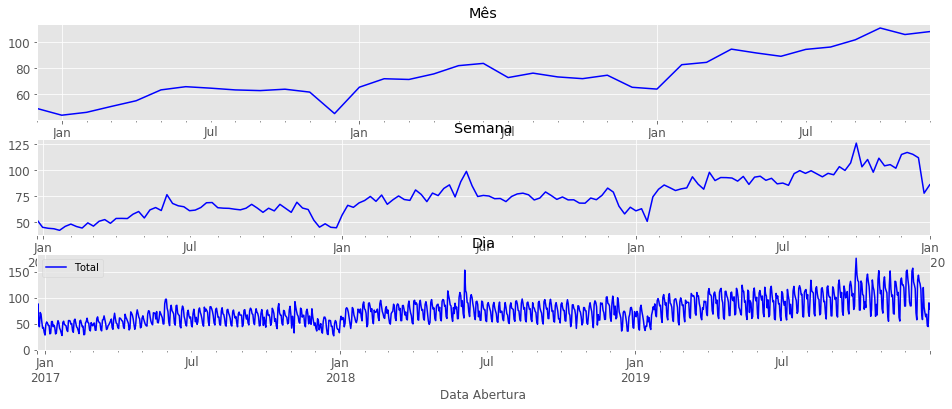

In [15]:
# Plot
fig, axs = plt.subplots(3,1, figsize=(16,6))
serie_media_mes.Total.plot(title = 'Mês', fontsize = 12, ax = axs[0], color = 'blue') 
serie_media_semana.Total.plot(title = 'Semana', fontsize = 12, ax = axs[1], color = 'blue') 
serie_media_dia.Total.plot(title = 'Dia', fontsize = 12, ax = axs[2], color = 'blue') 
plt.legend(loc = "best")
plt.show()

**Análise:** Observamos uma tendência na média de reclamações dos consumidores ao longo dos anos, será que essa tendencia de aumento é devido à aquisição de mais produtos? Não temos uma base dessas para correlacionar.

## 8.1 Há um dia específico para finalizar as reclamações?

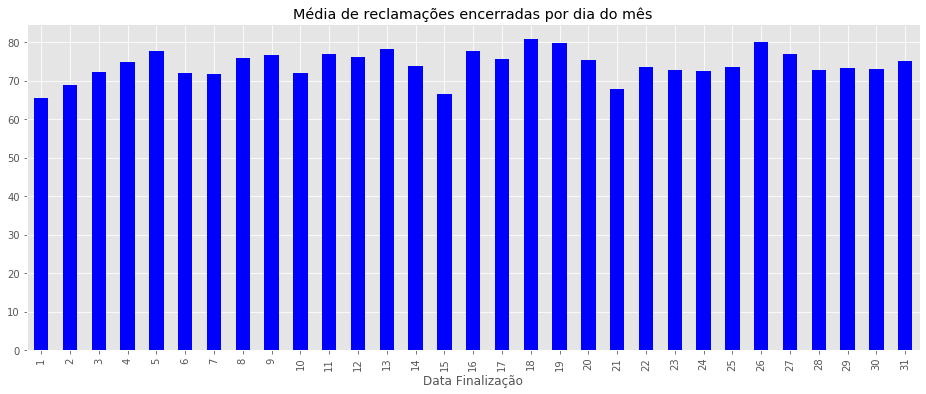

In [16]:
# Analisando os encerramentos nos dias do mês
plt.figure(figsize=(16, 6))
df_Temporal.groupby([df_Temporal['Data Finalização'].dt.day])['Total'].mean().plot.bar(color='b')
plt.title('Média de reclamações encerradas por dia do mês');

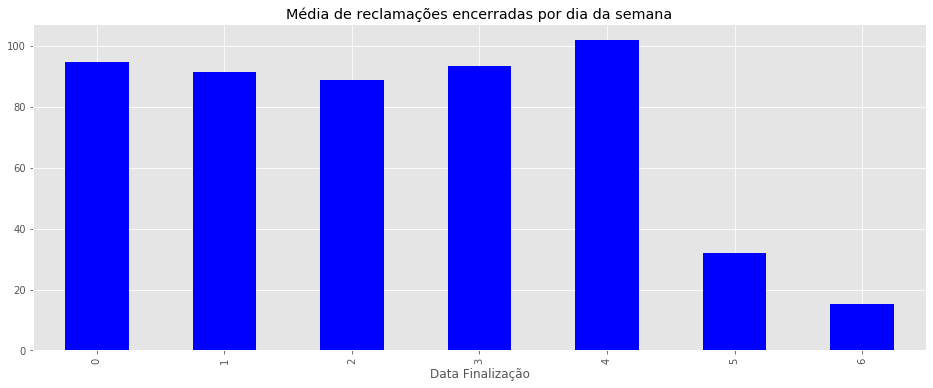

In [17]:
# Analisando os encerramentos nos dias da semana
plt.figure(figsize=(16, 6))
df_Temporal.groupby([df_Temporal['Data Finalização'].dt.dayofweek])['Total'].mean().plot.bar(color='b')
plt.title('Média de reclamações encerradas por dia da semana');

**Análise:** Nos finais de semana, com certeza é bem menos reclamações encerradas.

# Será possível prever a quantidade de dias que o consumidor deve esperar para ter sua reclamação atendida?

# Podemos fazer uma previsão de Serie Temporal para a quantidade de reclamações?

### Importação dos pacotes para Série Temporal

In [18]:
# Imports para modelagem preditiva
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import pmdarima as pm
import scipy
import scipy.stats as scs
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.stattools import jarque_bera

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error

# Imports para formatação dos gráficos
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 12,7
matplotlib.style.use('ggplot')
%matplotlib inline

In [19]:
df_Temporal.head()

,Data Finalização,Ano Abertura,Mes Abertura,Dia Abertura,Dia Semana Abertura,Tempo Resposta,Final Semana,Total
Data Abertura,,,,,,,,
2016-12-22,2017-01-01,2016.0,12.0,22.0,3.0,10.0,0,8
2016-12-23,2017-01-01,2016.0,12.0,23.0,4.0,9.0,0,8
2016-12-23,2017-01-02,2016.0,12.0,23.0,4.0,10.0,0,169
2016-12-24,2017-01-01,2016.0,12.0,24.0,5.0,8.0,1,10
2016-12-24,2017-01-02,2016.0,12.0,24.0,5.0,9.0,1,55


In [20]:
df_Temporal.shape

(12441, 8)

In [21]:
# preparando os dados
df_temp = pd.DataFrame(df_Temporal['Total'])
df_temp.head()

,Total
Data Abertura,
2016-12-22,8
2016-12-23,8
2016-12-23,169
2016-12-24,10
2016-12-24,55


Text(0.5, 1.0, 'Total de reclamações')

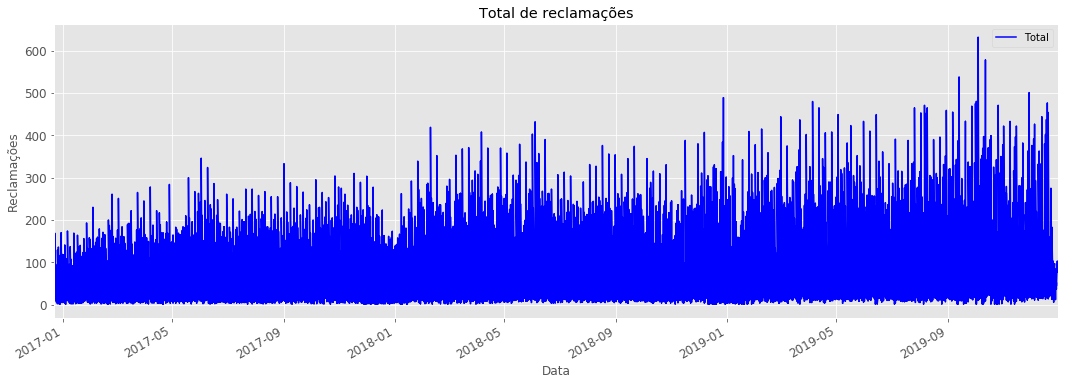

In [22]:
qtd_reclam = df_temp[['Total']]
ax = qtd_reclam.plot(color='b', figsize=(18,6))
plt.xlabel('Data')
plt.ylabel('Reclamações')
plt.title('Total de reclamações')

In [23]:
# reamostrando os dados para frequencia mensal
# usando o valor médio das reclamações diárias - definimos o mês como índice
media_reclam = qtd_reclam['Total'].resample('MS').mean()

In [24]:
# verificando o tipo
type(media_reclam)

pandas.core.series.Series

In [25]:
media_reclam.head()

Data Abertura
2016-12-01    49.236364
2017-01-01    44.082353
2017-02-01    46.285714
2017-03-01    50.791789
2017-04-01    55.130699
Freq: MS, Name: Total, dtype: float64

Text(0.5, 1.0, 'Média das reclamações')

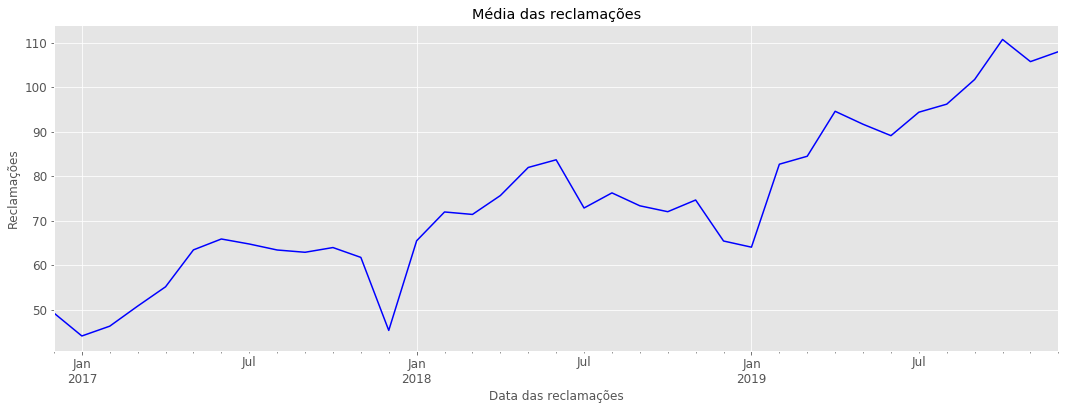

In [26]:
# reclamações média
media_reclam.plot(figsize=(18,6), color='b')
plt.xlabel('Data das reclamações')
plt.ylabel('Reclamações')
plt.title('Média das reclamações')

## Decompondo a série para avaliar seus componentes

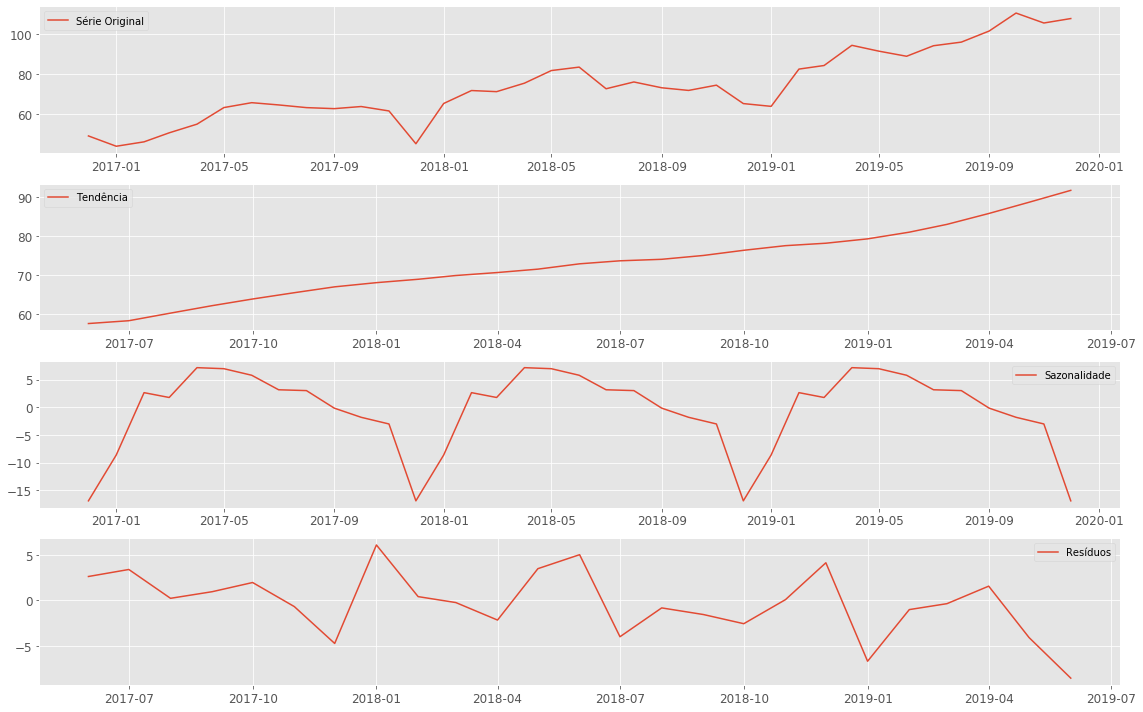

In [27]:
# decomposição da série temporal
decomposition = seasonal_decompose(media_reclam, freq=12)
rcParams['figure.figsize'] = 16,10

# componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot
plt.subplot(411)
plt.plot(media_reclam, label='Série Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Resíduos')
plt.legend(loc='best')

plt.tight_layout()

In [28]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

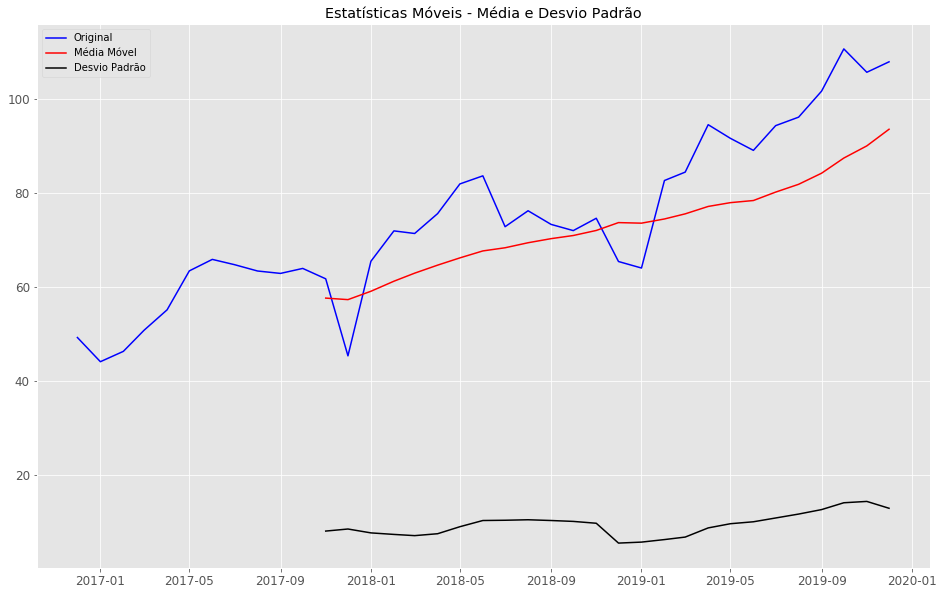


Resultado do Teste Dickey-Fuller:

Estatística do Teste            -0.824297
Valor-p                          0.811881
Número de Lags Consideradas      0.000000
Número de Observações Usadas    36.000000
Valor Crítico (1%)              -3.626652
Valor Crítico (5%)              -2.945951
Valor Crítico (10%)             -2.611671
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [29]:
# Verifica se a série é estacionária
testa_estacionaridade(media_reclam)

Antes de modelarmos para a previsão devemos transformar a série em estacionária.

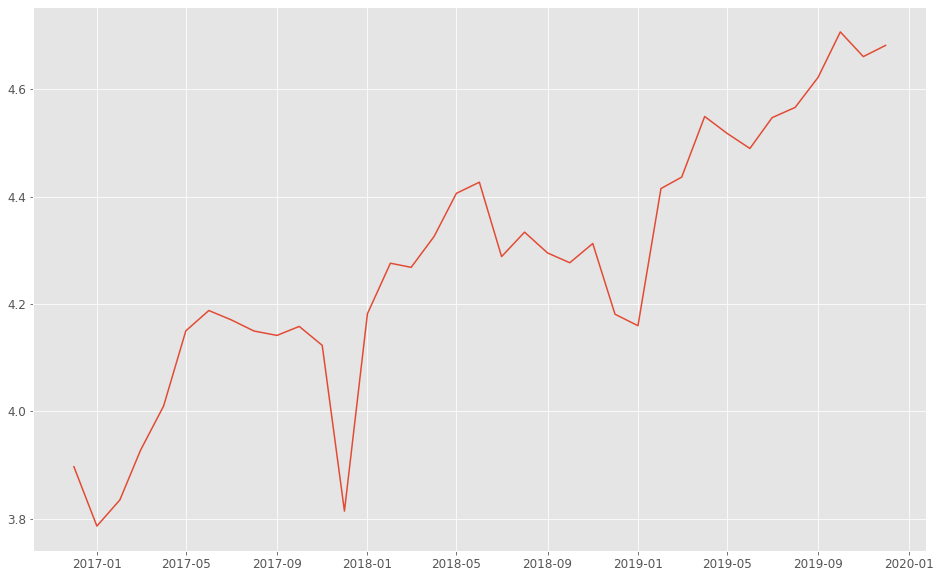

In [30]:
# vamos aplicar a transformação log
media_reclam_log = np.log(media_reclam)
plt.plot(media_reclam_log)

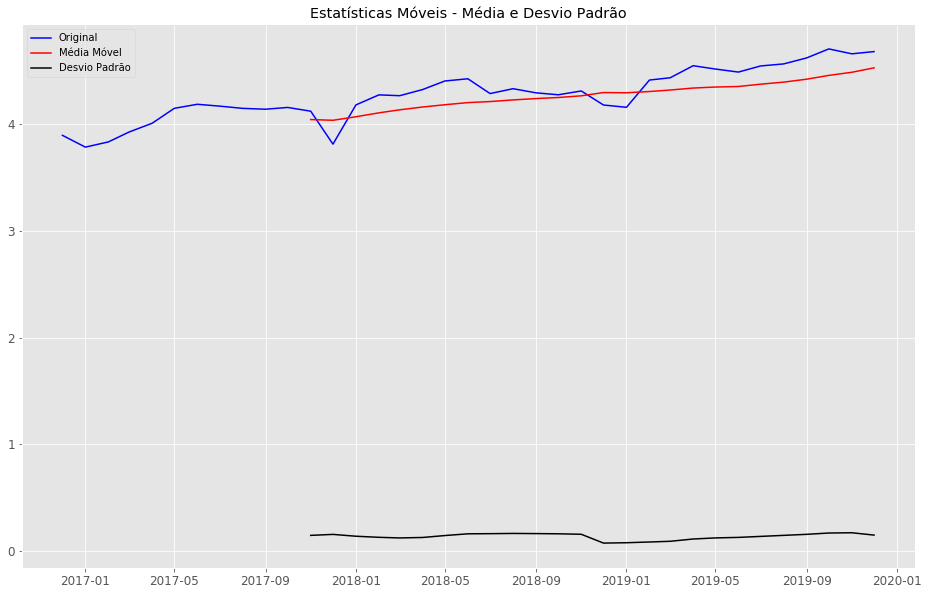


Resultado do Teste Dickey-Fuller:

Estatística do Teste            -1.317114
Valor-p                          0.621307
Número de Lags Consideradas      0.000000
Número de Observações Usadas    36.000000
Valor Crítico (1%)              -3.626652
Valor Crítico (5%)              -2.945951
Valor Crítico (10%)             -2.611671
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [31]:
# Verifica se a série é estacionária
testa_estacionaridade(media_reclam_log)

o método log não foi o suficiente, vamos tentar outra técnica

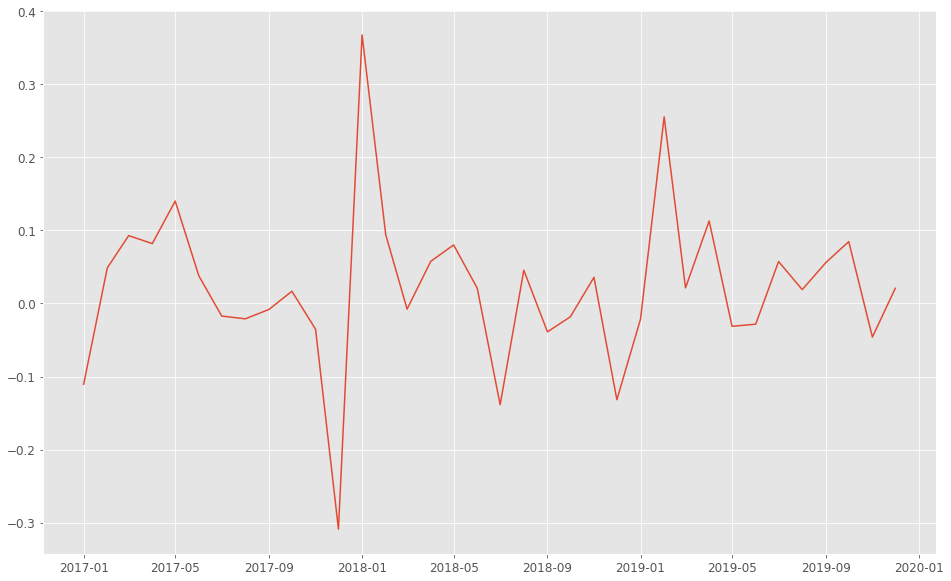

In [32]:
media_reclam_log_diff1 = pd.DataFrame(media_reclam_log).Total - pd.DataFrame(media_reclam_log).Total.shift()
plt.plot(media_reclam_log_diff1)

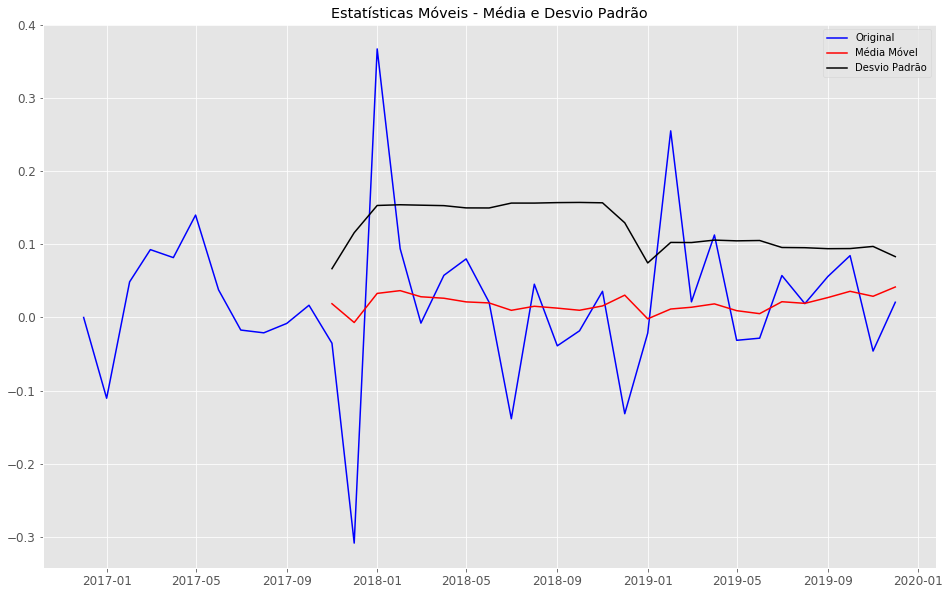


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -6.879830e+00
Valor-p                         1.442951e-09
Número de Lags Consideradas     0.000000e+00
Número de Observações Usadas    3.600000e+01
Valor Crítico (1%)             -3.626652e+00
Valor Crítico (5%)             -2.945951e+00
Valor Crítico (10%)            -2.611671e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [33]:
# Verifica se a série é estacionária
testa_estacionaridade(media_reclam_log_diff1.fillna(0))

Agora conseguimos e a série se tornou estacionária

# Dividindo os dados em treino e teste

In [34]:
# divisão em treino e validação
X = media_reclam_log_diff1
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]

In [35]:
train.shape, test.shape

((27,), (10,))

# Funções para cálculo da Acurácia

In [36]:
# função
def performance(y_true, y_pred):
    mse = ((y_pred - y_true)  ** 2).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(print('MSE das previsões é {}'.format(round(mse, 2))+
                 '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 2))+
                 '\nMAPE das previsões é {}'.format(round(mape, 2))))

# Modelo SARIMA

É um modelo ARIMA que suporta o componente sazonalidade (ciclo de repetições em um determinado período), Seasonal ARIMA.

In [37]:
# buscando pela ordem ideal para o modelo
# a função pm.auto_arima aplica o Grid Search e retorna o melhor modelo, para o menor valor possível da estatística AIC
modelo_v1 = pm.auto_arima(train.fillna(0),
                          seasonal=True,
                          m=12,
                          d=0,
                          D=1,
                          max_p=2,
                          max_q=2,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,1,1,12) [intercept=True]; AIC=-2.688, BIC=2.976, Time=2.127 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=-2.341, BIC=-0.925, Time=0.016 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=-6.392, BIC=-3.559, Time=0.630 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=-9.492, BIC=-6.660, Time=1.011 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=-4.327, BIC=-3.619, Time=0.016 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=-4.248, BIC=-2.123, Time=0.062 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=-4.392, BIC=-0.851, Time=0.811 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=-4.392, BIC=-0.852, Time=0.602 seconds
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=-5.932, BIC=-3.100, Time=0.507 secon

Analisando, encontramos o melhor modelo como:
- arima_order = (0,0,1)
- seasonal_order = (0,1,1,12)
- AIC = -9.492

In [38]:
# print do sumário do melhor modelo encontrado
print(modelo_v1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   27
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   8.746
Date:                            Sun, 10 May 2020   AIC                             -9.492
Time:                                    21:04:29   BIC                             -6.660
Sample:                                         0   HQIC                            -9.522
                                             - 27                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0078      0.016     -0.495      0.621      -0.039       0.023
ma.L1         -0.9789      3.674   

Usando os valores encontrado pelo Grid Search para treinar o modelo SARIMA

In [39]:
# criando o modelo
modelo_sarima_v1 = sm.tsa.statespace.SARIMAX(train.fillna(0),
                                             order=(0,0,1),
                                             seasonal_order=(0,1,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [40]:
# treinando o modelo
modelo_sarima_v1_fit = modelo_sarima_v1.fit()

In [41]:
# sumário do modelo
print(modelo_sarima_v1_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                   27
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   7.041
Date:                            Sun, 10 May 2020   AIC                             -8.083
Time:                                    21:04:29   BIC                            -14.083
Sample:                                12-01-2016   HQIC                              -inf
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6020   1.16e-14   -5.2e+13      0.000      -0.602      -0.602
ma.S.L12      -0.0284   2.22e-15  -

In [42]:
# diagnóstico do modelo
# modelo_sarima_v1_fit.plot_diagnostics(figsize=(16,8))
# plt.show()

In [43]:
# fazendo as previsões um passo a frente
sarima_predict_1 = modelo_sarima_v1_fit.get_prediction(start = pd.to_datetime('2019-02-01'), 
                                                       end = pd.to_datetime('2019-12-01'),
                                                       dynamic = False)

In [44]:
# Intervalo de confiança
sarima_predict_conf_1 = sarima_predict_1.conf_int()
sarima_predict_conf_1

,lower Total,upper Total
2019-02-01,0.254820,0.256189
2019-03-01,-0.005599,-0.004231
2019-04-01,0.057517,0.059113
2019-05-01,0.081114,0.082710
2019-06-01,0.020655,0.022251
2019-07-01,-0.136221,-0.134625
2019-08-01,0.042914,0.044510
2019-09-01,-0.038731,-0.037136
2019-10-01,-0.018037,-0.016441
2019-11-01,0.033026,0.034621


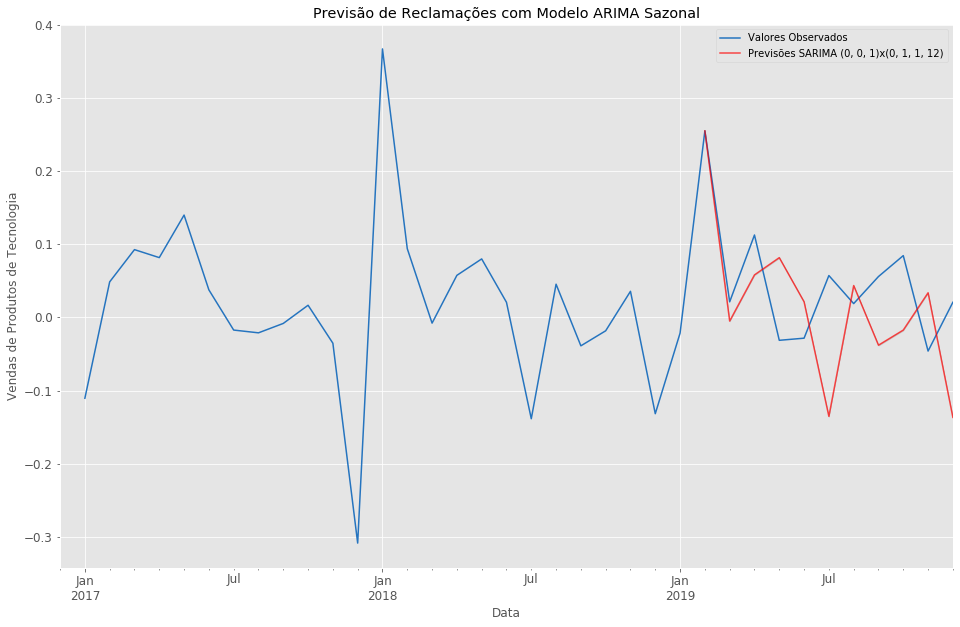

In [45]:
# Plot dos valores observados
ax = media_reclam_log_diff1.plot(label = 'Valores Observados', color = '#2574BF')

# Plot dos valores previstos
sarima_predict_1.predicted_mean.plot(ax = ax, 
                                     label = 'Previsões SARIMA (0, 0, 1)x(0, 1, 1, 12)', 
                                     alpha = 0.7, 
                                     color = 'red') 

# Plot do intervalo de confiança
ax.fill_between(sarima_predict_conf_1.index,
                # lower Total
                sarima_predict_conf_1.iloc[:, 0],
                # upper Total
                sarima_predict_conf_1.iloc[:, 1], color = 'k', alpha = 0.1)

# Títulos e Legendas
plt.title('Previsão de Reclamações com Modelo ARIMA Sazonal')
plt.xlabel('Data')
plt.ylabel('Vendas de Produtos de Tecnologia')
plt.legend()
plt.show()

In [46]:
# Calculando a performance
sarima_results = performance(test, sarima_predict_1.predicted_mean)
sarima_results

MSE das previsões é 0.01
RMSE das previsões é 0.1
MAPE das previsões é 239.27


In [47]:
# Forecast (previsão) de 60 passos no tempo
horizonte_60_predict_1 = modelo_sarima_v1_fit.get_forecast(steps = 60)

In [48]:
# Intervalo de confiança
horizonte_60_predict_1_conf_1 = horizonte_60_predict_1.conf_int()
horizonte_60_predict_1_conf_1

,lower Total,upper Total
2019-03-01,-0.005599,-0.004231
2019-04-01,0.057517,0.059113
2019-05-01,0.081114,0.082710
2019-06-01,0.020655,0.022251
2019-07-01,-0.136221,-0.134625
2019-08-01,0.042914,0.044510
2019-09-01,-0.038732,-0.037135
2019-10-01,-0.018037,-0.016441
2019-11-01,0.033026,0.034621
2019-12-01,-0.137574,-0.135979


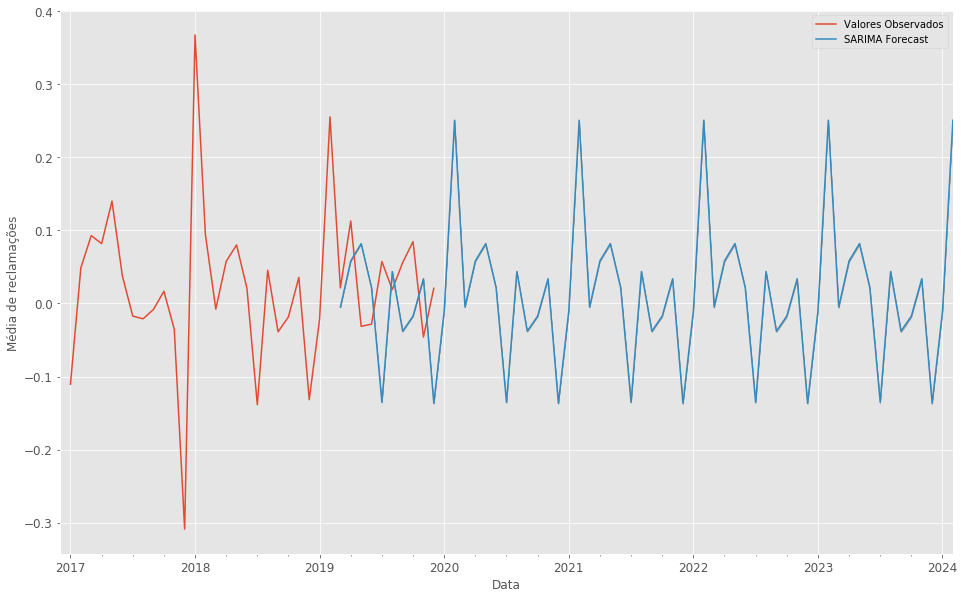

In [49]:
# Plot dos valores observados
ax = media_reclam_log_diff1.plot(label = 'Valores Observados')

# Plot dos valores previstos
horizonte_60_predict_1.predicted_mean.plot(ax = ax, label = 'SARIMA Forecast')

# Plot do intervalo de confiança
ax.fill_between(horizonte_60_predict_1_conf_1.index,
                horizonte_60_predict_1_conf_1.iloc[:, 0],
                horizonte_60_predict_1_conf_1.iloc[:, 1], color = 'k', alpha = .25)

# Plot
ax.set_xlabel('Data')
ax.set_ylabel('Média de reclamações')
plt.legend()
plt.show()